In [1]:
import numpy as np
from importlib import reload

from astropy import units as u

from astropy.visualization import hist as ahist

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
rcParams['axes.prop_cycle'] = style.library['seaborn-deep']['axes.prop_cycle']

In [3]:
import data_loaders

In [4]:
elvii_pairs = data_loaders.load_elvii_z0(isolated=False)

Loading /Users/erik/projects/lsst_experiments/elvis_data/PairedCatalogs/Hall&Oates.txt
Loading /Users/erik/projects/lsst_experiments/elvis_data/PairedCatalogs/Hamilton&Burr.txt
Loading /Users/erik/projects/lsst_experiments/elvis_data/PairedCatalogs/Kek&Kauket.txt
Loading /Users/erik/projects/lsst_experiments/elvis_data/PairedCatalogs/Lincoln&Douglas.txt
Loading /Users/erik/projects/lsst_experiments/elvis_data/PairedCatalogs/Orion&Taurus.txt
Loading /Users/erik/projects/lsst_experiments/elvis_data/PairedCatalogs/Romulus&Remus.txt
Loading /Users/erik/projects/lsst_experiments/elvis_data/PairedCatalogs/Scylla&Charybdis.txt
Loading /Users/erik/projects/lsst_experiments/elvis_data/PairedCatalogs/Serena&Venus.txt
Loading /Users/erik/projects/lsst_experiments/elvis_data/PairedCatalogs/Siegfried&Roy.txt
Loading /Users/erik/projects/lsst_experiments/elvis_data/PairedCatalogs/Sonny&Cher.txt
Loading /Users/erik/projects/lsst_experiments/elvis_data/PairedCatalogs/Thelma&Louise.txt
Loading /Users/e

# Find trivial volume correction from ELVIS 

Excises M31, but does *not* include any LF detectability adjustment, so large grain-of-salt required

(array([ 1.,  0.,  7.,  4.,  3.,  4.,  1.,  2.,  1.,  1.]),
 array([ 0.49405234,  0.52370836,  0.55336437,  0.58302039,  0.61267641,
         0.64233243,  0.67198845,  0.70164446,  0.73130048,  0.7609565 ,
         0.79061252]),
 <a list of 1 Patch objects>)

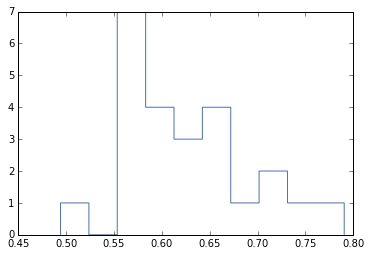

In [5]:
fracbeyond300 = []
for pair, tab in elvii_pairs.items():
    for i in (0,1):
        msk = ~tab['sat_of_{}'.format(0 if i==1 else 1)]&(tab['host{}_dist'.format(i)]<1*u.Mpc)
        fracbeyond300.append(np.sum(tab[msk]['host{}_dist'.format(i)]>300*u.kpc)/np.sum(msk))
ahist(fracbeyond300, bins=10, histtype='step')

## Implied limits based on Hargis+ 14

In [6]:
hargis_gtr3 = (37,114) #>10^3
hargis_lth3 = (131,782) #<10^3

(array([ 2.,  2.,  1.,  4.,  4.,  3.,  6.,  1.,  0.,  1.]),
 array([  989.10652632,  1048.47869872,  1107.85087113,  1167.22304354,
         1226.59521595,  1285.96738836,  1345.33956077,  1404.71173318,
         1464.08390558,  1523.45607799,  1582.8282504 ]),
 <a list of 1 Patch objects>)

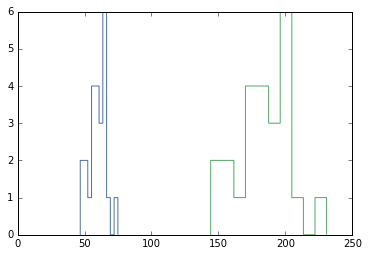

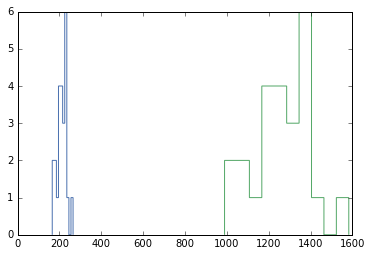

In [7]:
# these are the 
gtr = (37,114) #>10^3
lth = (131,782) #<10^3

gtrcorr = np.array(hargis_gtr3).reshape(2,1)*np.array(fracbeyond300)**-1
lthcorr = np.array(hargis_lth3).reshape(2,1)*np.array(fracbeyond300)**-1

ahist(gtrcorr[0], bins=10, histtype='step')
ahist(gtrcorr[1], bins=10, histtype='step')

plt.figure()
ahist(lthcorr[0], bins=10, histtype='step')
ahist(lthcorr[1], bins=10, histtype='step')